In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('Classified Data',index_col=0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

scaler.fit(df.drop('TARGET CLASS',axis=1))

scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
df_new=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_new,df['TARGET CLASS'],test_size=0.3,random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

C:\Users\gauta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print('Confusion Matrix :\n',confusion_matrix(y_test,pred))
print('\nClassification Report : \n',classification_report(y_test,pred))

Confusion Matrix :
 [[154   5]
 [ 12 129]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
#finding the most effective k value

error_rate=[]

for i in range(1,35):
    
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred=Knn.predict(X_test)
    
    error_rate.append(np.mean(y_test!=pred))

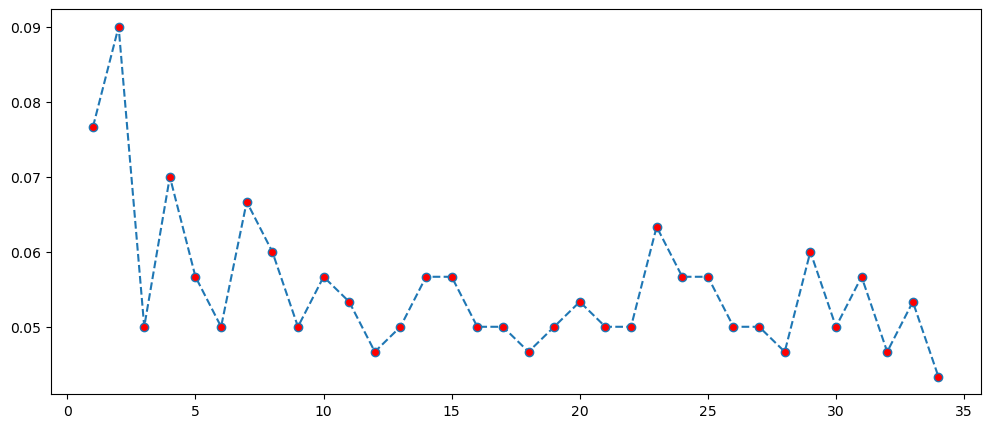

In [22]:
plt.figure(figsize=(12,5))

plt.plot(range(1,35),error_rate,linestyle='dashed',marker='o',markerfacecolor='red')

In [ ]:
#taking the value of k as 34
knn=KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)

In [24]:
print('Confusion Matrix :\n',confusion_matrix(y_test,pred))
print('\nClassification Report : \n',classification_report(y_test,pred))

Confusion Matrix :
 [[153   6]
 [  7 134]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

